In [11]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate
import yaml

%matplotlib inline

In [2]:
#values for csv importing
csv_opts = {'sep': '|',
           'quotechar': '"',
           #'compression': 'gzip',
           'encoding': 'utf-8'}

In [80]:
with open('../hand/encounter_dtypes.yaml', 'r') as yamlfile:
        encounter_dtypes = yaml.load(yamlfile, Loader=yaml.FullLoader)

In [112]:
#reading in CSV file
encounters = pd.read_csv('../input/encounters.csv', **csv_opts, dtype=encounter_dtypes)

In [113]:
#putting event date into m/d/y format
encounters['event_date'] = pd.to_datetime(encounters['event_date'], format='%m/%d/%Y')

# Overview

In [83]:
# overview of variables in encounters dataset
encounters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689378 entries, 0 to 1689377
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   aor                     1608957 non-null  category      
 1   event_date              1689378 non-null  datetime64[ns]
 2   landmark                1029394 non-null  category      
 3   operation               298737 non-null   category      
 4   processing_disposition  1686035 non-null  category      
 5   citizenship             1689378 non-null  category      
 6   gender                  1689360 non-null  category      
 7   id                      1689378 non-null  int64         
dtypes: category(6), datetime64[ns](1), int64(1)
memory usage: 39.0 MB


In [123]:
# column heads of encounters dataset
encounters.head()

,aor,event_date,landmark,operation,processing_disposition,citizenship,gender,id,non-specific
0,DEN,2015-10-01,EAGLE COUNTY JAIL,NaN,Not Amenable to Removal,MEXICO,Male,0,0
1,NaN,2015-10-01,NaN,NaN,Notice to Appear Released (I-862),ECUADOR,Male,1,0
2,SFR,2015-10-01,TAFT FEDERAL CORRECTIONAL INSTITUTION,(B)(7)(E),ADMINISTRATIVE DEPORTATION I-851/I-851A,MEXICO,Male,2,0
3,LOS,2015-10-01,"WSM GENERAL AREA, NON-SPECIFIC",(B)(7)(E),Detainer,BELIZE,Male,3,1
4,ATL,2015-10-01,NaN,NaN,Not Amenable to Removal,JAMAICA,Male,4,0


## Null Values

In [10]:
# creating table for null values of encounters
# formatting added for commas and percent sign
null_table = [['Variable', 'NaN', '% Nan'], 
              ['AOR', 
               "{:,}".format(sum(pd.isnull(encounters.aor))), 
               str(round(sum(pd.isnull(encounters.aor)) / len(encounters) * 100, 2)) +'%'], 
              ['Event Date', 
               "{:,}".format(sum(pd.isnull(encounters.event_date))), 
               str(round(sum(pd.isnull(encounters.event_date)) / len(encounters) * 100, 2)) +'%'],
              ['Landmark', 
               "{:,}".format(sum(pd.isnull(encounters.landmark))), 
               str(round(sum(pd.isnull(encounters.landmark)) / len(encounters) * 100, 2)) +'%'],
              ['Operation', 
               "{:,}".format(sum(pd.isnull(encounters.operation))), 
               str(round(sum(pd.isnull(encounters.operation)) / len(encounters) * 100, 2)) +'%'],
              ['Processing Disposition', 
               "{:,}".format(sum(pd.isnull(encounters.processing_disposition))), 
               str(round(sum(pd.isnull(encounters.processing_disposition)) / len(encounters) * 100, 2)) +'%'],
              ['Citizenship', 
               "{:,}".format(sum(pd.isnull(encounters.citizenship))), 
               str(round(sum(pd.isnull(encounters.citizenship)) / len(encounters) * 100, 2)) +'%'],
              ['Gender', 
               "{:,}".format(sum(pd.isnull(encounters.gender))), 
               str(round(sum(pd.isnull(encounters.gender)) / len(encounters) * 100, 2)) +'%']
             ]

#print header and table of null values
print('Null values for Encounters data (total = 1,689,378)')
print(tabulate(null_table, headers='firstrow', 
               tablefmt='fancy_grid', stralign='center', numalign='center'))

Null values for Encounters data (total = 1,689,378)
╒════════════════════════╤═══════════╤═════════╕
│        Variable        │    NaN    │  % Nan  │
╞════════════════════════╪═══════════╪═════════╡
│          AOR           │  80,421   │  4.76%  │
├────────────────────────┼───────────┼─────────┤
│       Event Date       │     0     │  0.0%   │
├────────────────────────┼───────────┼─────────┤
│        Landmark        │  659,984  │ 39.07%  │
├────────────────────────┼───────────┼─────────┤
│       Operation        │ 1,390,641 │ 82.32%  │
├────────────────────────┼───────────┼─────────┤
│ Processing Disposition │   3,343   │  0.2%   │
├────────────────────────┼───────────┼─────────┤
│      Citizenship       │     0     │  0.0%   │
├────────────────────────┼───────────┼─────────┤
│         Gender         │    18     │  0.0%   │
╘════════════════════════╧═══════════╧═════════╛


## Duplicates

The encounters dataset includes no duplicate records.

In [6]:
# create dataframe for duplicate rows
duplicate = encounters[encounters.duplicated()]

In [8]:
#print length of duplicate df
len(duplicate)

0

# Event Date

In [128]:
# create subset of just aor, date, and id
encounters_by_fy = encounters[["aor", "event_date", "id"]]

# group subset by aor and date, then count ids
encounters_by_fy = encounters_by_fy.groupby(["aor", "event_date"], 
                                            as_index=False, dropna=False)['id'].count()

# pivot subset so that index is the event date and columns are aor (allows for easy Grouper in next line of code)
encounters_by_fy = encounters_by_fy.pivot(index='event_date', 
                                          columns='aor', values='id')

# group subset by fiscal year and total all the values 
encounters_by_fy = encounters_by_fy.groupby(pd.Grouper(freq='AS-OCT'), dropna=False).sum()

event_date,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00,2018-10-01 00:00:00
aor,,,,
LOS,"27,046","38,256","54,971","51,134"
MIA,"27,114","31,627","45,876","45,330"
NYC,"22,294","49,882","42,028","33,001"
DAL,"28,904","33,308","33,758","29,929"
ATL,"33,227","28,263","28,876","25,275"
SNA,"15,552","19,749","23,144","19,832"
PHO,"18,219","19,695","20,108","16,802"
SPM,"14,819","17,698","18,080","16,730"
HOU,"17,112","18,404","19,295","15,311"


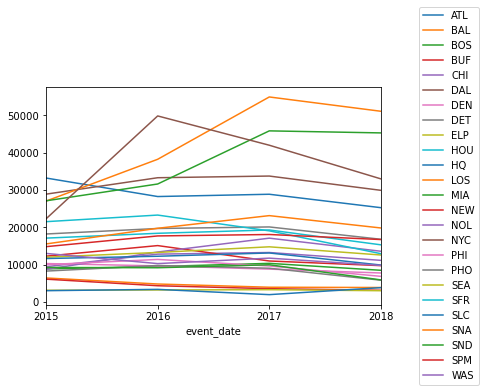

In [127]:
# create plot of the subset by FY
encounters_by_fy.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))

# create plot of the subset by FY
encounters_by_fy.T.sort_values(by=["2018-10-01 00:00:00"], 
                               ascending=False).style.format("{:,.0f}")

# Landmarks

In [119]:
# create series of how many unique landmarks there are, regardless of capitalization
encounters_landmarks = encounters.landmark.str.upper().value_counts()

In [120]:
# convert series to dataframe and print resulting table
encounters_landmarks = encounters_landmarks.to_frame()
encounters_landmarks

,landmark
SC INTEROPERABILITY LAFO,96414
"GCJ GENERAL AREA, NON-SPECIFIC",21263
"WSM GENERAL AREA, NON-SPECIFIC",17520
CAP - MARICOPA COUNTY SHERIFFS OFFICE JAIL,14066
"TEXAS DEPT OF CRIMINAL JUSTICE, WALKER CO",12552
...,...
"ALPENA COUNTY JAIL, ALPENA, MI",1
"U.S. FEDERAL PRISON LOMPOC- MEDIUM, LOMPOC, CA",1
WASHINGTON COUNTY PROBATION,1
MISSISSIPPI DOC BAY ST LOUIS (PROBATION),1


In [121]:
# create subset of location variables, counting IDs
encounters_distinct_landmarks = encounters[['aor', 'landmark', 'id']].groupby(
    ['aor', 'landmark'], as_index=False, dropna=False).count()

# display all locations with at least one encounter, sorted by largest to smallest
encounters_distinct_landmarks.loc[
    encounters_distinct_landmarks['id'] > 0].sort_values('id', ascending=False)

,aor,landmark,id
93696,LOS,SC INTEROPERABILITY LAFO,96394
1156,ATL,"GCJ GENERAL AREA, NON-SPECIFIC",21263
94218,LOS,"WSM GENERAL AREA, NON-SPECIFIC",17508
141587,PHO,CAP - MARICOPA COUNTY SHERIFFS OFFICE JAIL,14056
77326,HOU,"TEXAS DEPT OF CRIMINAL JUSTICE, WALKER CO",12548
...,...,...,...
91717,LOS,CAP - BEDFORD POLICE DEPARTMENT NY STATE,1
91724,LOS,"CAP - CALHOUN COUNTY JAIL, AL STATE",1
91728,LOS,"CAP - CARSON CITY JAIL, CARSON CITY NEVADA",1
91745,LOS,CAP - DOWNSTATE CORRECTIONAL FACILITY NY STATE,1


<AxesSubplot:ylabel='Frequency'>

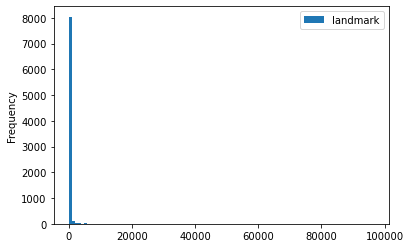

In [72]:
# create a historgram of encounter landmarks in groups of 100
encounters_landmarks.plot(kind='hist', bins=100)

In [122]:
# add a column to encounters dataset that contains a binary indicator 
# of whether the landmark includes the term 'non-specific'  
encounters['non-specific'] = encounters['landmark'].str.contains(
    'non-specific', case=False, na=False).astype(int)

# create subset and calculate for each AOR 
# the number of non-specific occurences divided by the total number of encounters
# sort resulting proportions from largest to smallest
dub = encounters[['aor','id', 'non-specific']]
dub = dub.groupby('aor', dropna=False)['non-specific'].sum()/dub.groupby('aor', dropna=False)['id'].count()
dub.sort_values(ascending=False)

aor
ATL    0.348916
WAS    0.341367
ELP    0.324316
CHI    0.317695
SNA    0.307817
SLC    0.285017
NOL    0.231434
PHI    0.220644
HOU    0.213086
LOS    0.184823
SFR    0.180508
DET    0.173404
HQ     0.142469
MIA    0.133180
SPM    0.119031
BOS    0.113580
DAL    0.092884
BAL    0.078346
PHO    0.070592
BUF    0.053056
SND    0.047127
NEW    0.036413
DEN    0.017890
NYC    0.010237
SEA    0.002965
dtype: float64

## Top Ten Landmarks by AOR (aggregate)

In [129]:
# create subset of encounters by location
encounters_location = encounters.groupby(
    ['aor', 'landmark'], as_index=False, dropna=False)['id'].count()

# create a subset of the ten largest landmarks in each AOR
encounters_aor_agg = encounters_location.sort_values(
    ['aor', 'id'], ascending=False).groupby('aor', dropna=False).head(10)

# create a list of AORs in the dataset, excluding NAN
fub = set(encounters['aor'])
fub.remove(np.nan)

# function that creates a plot of the top ten largest landmarks when given an AOR
def top_landmarks_aggregate(place):
    encounters_aor_agg.loc[encounters_aor['aor'] == place].plot(
        y='id', x='landmark', kind='barh').invert_yaxis()
    plt.title(place + " " + str(encounters.loc[encounters['aor'] == place]['id'].count()))
    return

In [62]:
# creates a plot that can select an AOR using a drop down widget
widgets.interact(top_landmarks_aggregate, place = fub)

interactive(children=(Dropdown(description='place', options=('NEW', 'CHI', 'LOS', 'BUF', 'SND', 'DEN', 'SPM', …

<function __main__.top_landmarks_aggregate(place)>

## Top Ten Landmarks by AOR (proportions)

In [131]:
# create new column in subset of encounters by location 
# that is the sum of all encounters in that AOR
encounters_location['aor total'] = encounters_location.groupby(
    'aor', sort=False, dropna=False)["id"].transform('sum')

# create new column in subset of encounters by location that is the 
# proportion of encounters in a landmark divided by the total encounters in that AOR
encounters_location['aor proportion'] = encounters_location['id']/encounters_location['aor total']

# create a subset of the top ten most common landmarks in each AOR
encounters_aor_prop = encounters_location.sort_values(['aor', 'id'], 
                                    ascending=False).groupby('aor', dropna=False).head(10)

# function creates a plot of the proportion of the top ten largest landmarks in a given AOR
def top_landmarks_proportion(place):
    encounters_aor_prop.loc[encounters_aor_prop['aor'] == place].plot(
        y='aor proportion', x='landmark', kind='barh').invert_yaxis()
    plt.title(place + " " + str(encounters.loc[encounters['aor'] == place]['id'].count()))
    return

In [60]:
# creates a plot that can select an AOR using a drop down widget
widgets.interact(top_landmarks_proportion, place = fub)

interactive(children=(Dropdown(description='place', options=('NEW', 'CHI', 'LOS', 'BUF', 'SND', 'DEN', 'SPM', …

<function __main__.top_landmarks_proportion(place)>

# Processing Disposition

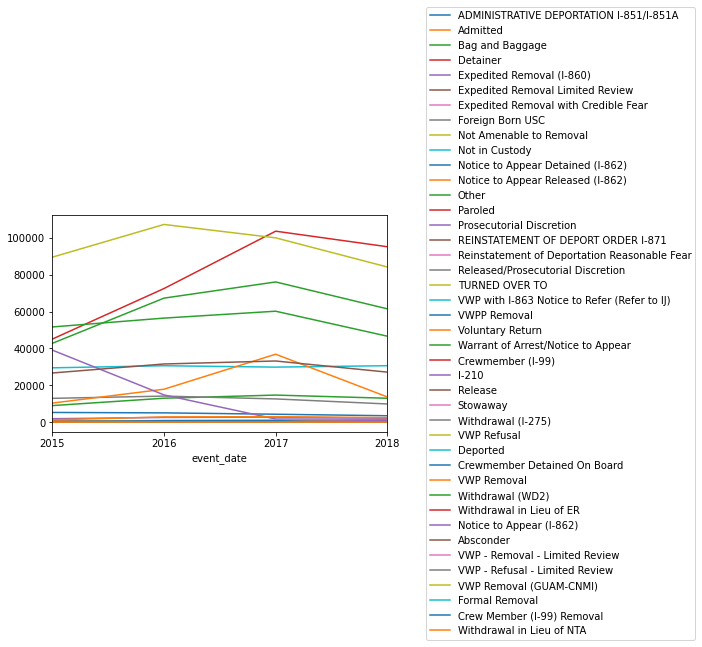

In [50]:
# create subset of encounters with date, processing disposition and ID
encounters_by_disposition = encounters[["event_date", "processing_disposition", "id"]]

# count the number of encounters by each type of processing disposition and date
encounters_by_disposition = encounters_by_disposition.groupby(
    ["processing_disposition", "event_date"], as_index=False, dropna=False)['id'].count()

# pivot df so that index is date and columns are processing disposition 
# (allows for easy groupby in next line of code)
encounters_by_disposition = encounters_by_disposition.pivot(
    index='event_date', columns='processing_disposition', values='id')

# group by fiscal year
encounters_by_disposition = encounters_by_disposition.groupby(
    pd.Grouper(freq='AS-OCT'), dropna=False).sum()

# plot disposition types over time
encounters_by_disposition.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))

In [52]:
# transpose table of transposed df to show disposition types over fiscal years
encounters_by_disposition.transpose().sort_values(
    by=["2018-10-01 00:00:00"], ascending=False).style.format("{:,.0f}")

event_date,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00,2018-10-01 00:00:00
processing_disposition,,,,
Detainer,"45,099","72,502","103,620","95,182"
Not Amenable to Removal,"89,535","107,261","100,000","84,202"
Warrant of Arrest/Notice to Appear,"42,784","67,296","76,073","61,492"
Other,"51,653","56,453","60,190","46,645"
Not in Custody,"29,467","30,607","29,850","30,630"
REINSTATEMENT OF DEPORT ORDER I-871,"26,674","31,558","33,178","27,136"
Notice to Appear Released (I-862),"10,341","17,865","36,860","13,687"
Bag and Baggage,"8,979","12,978","14,679","12,959"
Foreign Born USC,"12,913","14,127","12,595","9,857"


# Citizenship

In [134]:
# create dataframe of encounter frequency by citizenship
enc_cit = encounters.citizenship.value_counts(normalize=True).to_frame()

# renames column header
enc_cit.columns = ["encounters"]

# converts column to percent
enc_cit = enc_cit*100
enc_cit = enc_cit.round(decimals=2)
enc_cit = enc_cit.sort_values(by = ['encounters'], ascending=False)
enc_cit = enc_cit.astype(str) + '%'

# displays results
enc_cit

,encounters
MEXICO,43.82%
UNKNOWN,7.51%
GUATEMALA,6.62%
HONDURAS,5.53%
EL SALVADOR,4.89%
...,...
MADAGASCAR,0.0%
FRENCH POLYNESIA,0.0%
ANGUILLA,0.0%
ARUBA,0.0%
